In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['text.usetex'] = True

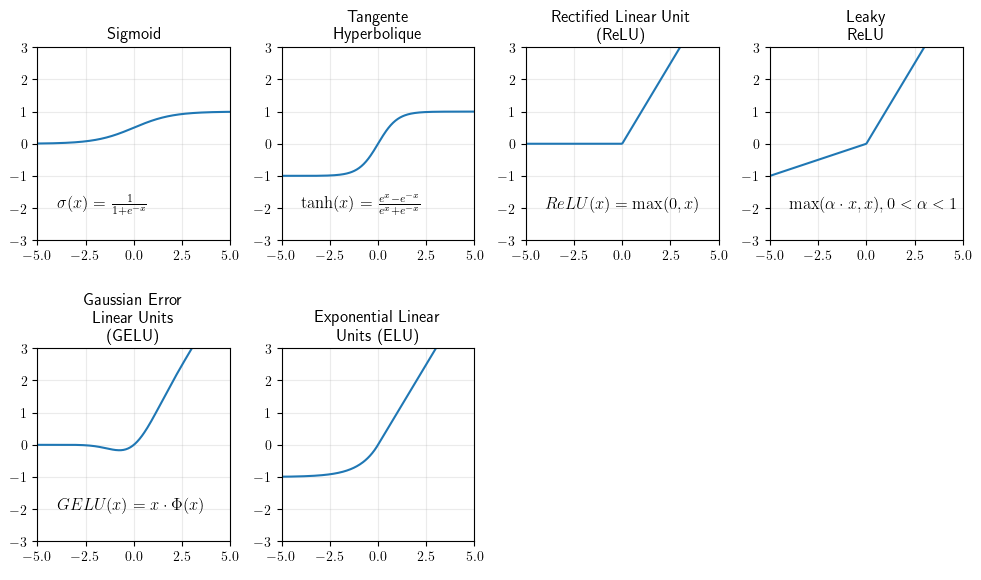

In [12]:
x = np.linspace(-10, 10, 500)

def ELU(x, alpha=1.0):
    y = x.copy()
    y[x<0] = alpha * (np.exp(x[x<0]) - 1)
    return y

def ReLU(x, alpha=1.0):
    y = x.copy()
    y[x<0] = 0
    return y

def leaky_ReLU(x, alpha=0.2):
    y = x.copy()
    y[x<0] = x[x<0] * alpha
    return y

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

def GELU(x):
    return 0.5 * x * (1 + np.tanh(math.sqrt(2/math.pi)* (x + 0.044715 * x**3 )))

elu_eq = (r"$ELU(x) = \left\{\begin{matrix}"
          r"x, &  if x > 0 \\ "
          r"\alpha * (\exp(x) - 1), &  if  x \leq 0 "
          r"\end{matrix}\right.$")

eq = {
'sig':r"$\sigma(x) = \frac{1}{1+e^{-x}}$",
'tanh':r"$\tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$",
'relu':r"$ ReLU(x) = \max(0, x)$",
'gelu':r"$ GELU(x) = x \cdot \Phi(x)$",
'elu':"",
'lrelu':r"$\max(\alpha \cdot x, x), 0 < \alpha < 1$",
}

act = {
    'Sigmoid': (sigmoid, eq['sig']),
    'Tangente \n Hyperbolique': (tanh, eq['tanh']),
    'Rectified Linear Unit \n (ReLU)':(ReLU, eq['relu']),
    'Leaky \n ReLU':(leaky_ReLU, eq['lrelu']),
    'Gaussian Error \n Linear Units \n (GELU)':(GELU, eq['gelu']),
    'Exponential Linear \n Units (ELU)': (ELU, eq['elu'])
}


def plot_acts(acts):
    n_acts = len(acts)
    n_cols = 4
    n_rows = math.ceil(n_acts/n_cols)
    fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows)
    for i, (title, (func, eq)) in enumerate(acts.items()):
        col, row = divmod(i, n_cols)
        ax = axs[col, row] 
        ax.plot(x, func(x))
        ax.set_ylim(-3, 3)
        ax.set_xlim(-5, 5)

        ax.set_title(title)
        ratio = 1.0
        x_left, x_right = ax.get_xlim()
        y_low, y_high = ax.get_ylim()
        ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
        ax.grid('major', alpha=0.25)
        
        ax.text(-4, -2, eq, fontsize=12)
    
    for j in range(i+1, n_cols*n_rows):
        col, row = divmod(j, n_cols)
        ax = axs[col, row] 
        ax.axis('off')
    fig.set_size_inches(10,6)
    # fig.show()
    plt.tight_layout()
    fig.savefig('activation_functions.png')
    
plot_acts(act)

In [3]:
math.pi

3.141592653589793